In [ ]:
import os;
from google.colab import drive
drive.mount('/content/drive', force_remount=True);



Mounted at /content/drive


In [ ]:
path = "/content/drive/Shared drives/Computational Optics Group/Yizhou_Lu_FLIM/Eigen Face";
os.chdir(path);
os.listdir(path);

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

plt.style.use("seaborn-ticks")

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
Possion = True;
light_level_list = np.power(10.0, np.arange(13)-3);
iter = 50;

In [ ]:
def Eigen_faces(Poisson, light_level, step = 1): ## step决定是否plot出来
    df = pd.read_csv('face_data.csv');
    def plot_faces(pixels):
        fig, axes = plt.subplots(5, 5, figsize=(6, 6));
        for i, ax in enumerate(axes.flat):
            ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray');
        plt.show();
        
    X = df.drop('target', axis=1);
    y = df['target'];
    
    if Poisson:
        X = np.random.poisson(X* light_level)/light_level;
        if step == 1:
            plot_faces(X);
        
    X_train, X_test, y_train, y_test = train_test_split(X, y);
    pca = PCA(n_components=105).fit(X_train);
    X_train_pca = pca.transform(X_train);
    classifier = SVC().fit(X_train_pca, y_train);
    X_test_pca = pca.transform(X_test);
    predictions = classifier.predict(X_test_pca);
    
    return sum(np.array(y_test) == np.array(predictions))/len(y_test);
    

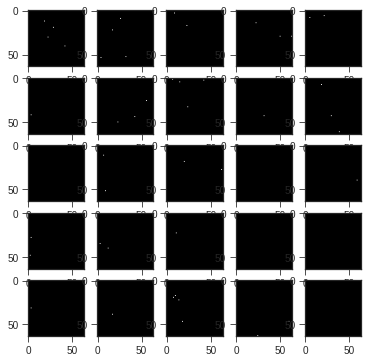

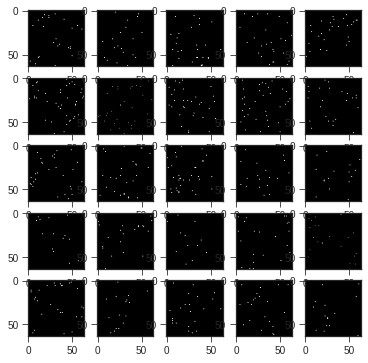

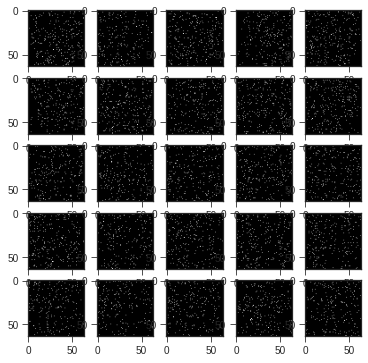

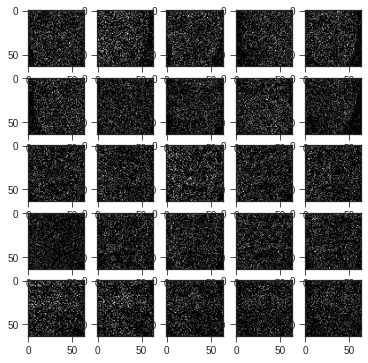

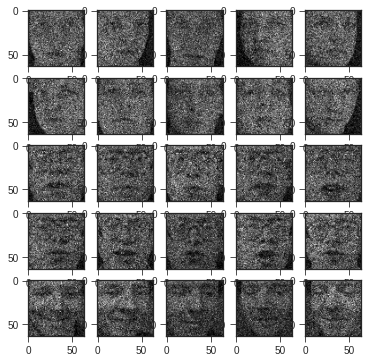

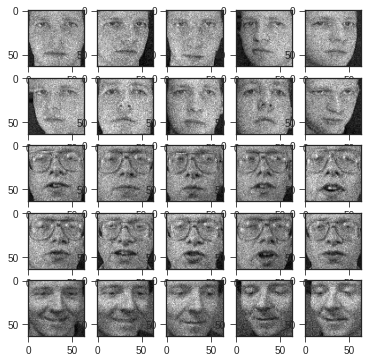

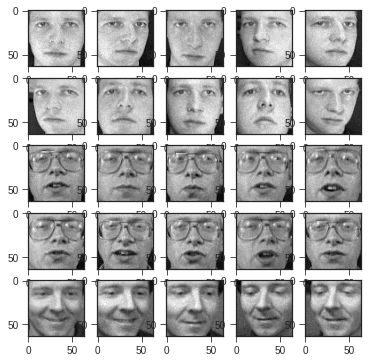

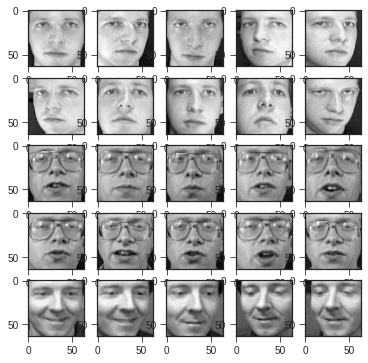

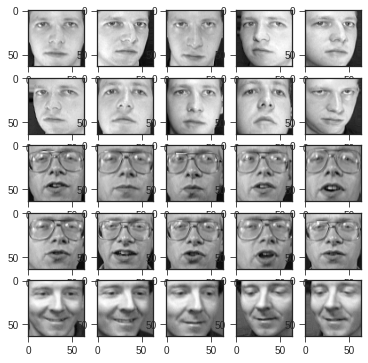

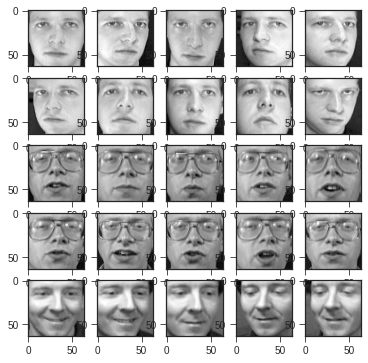

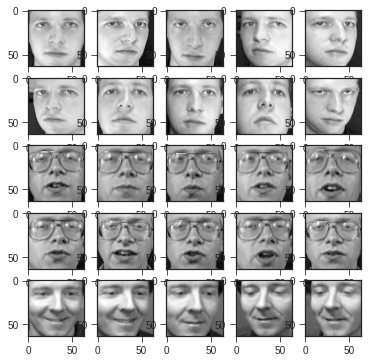

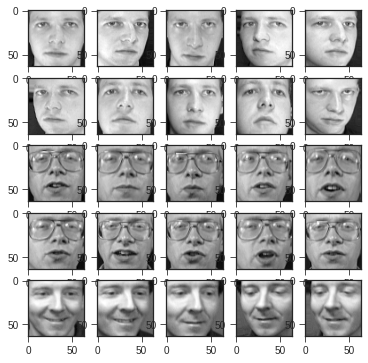

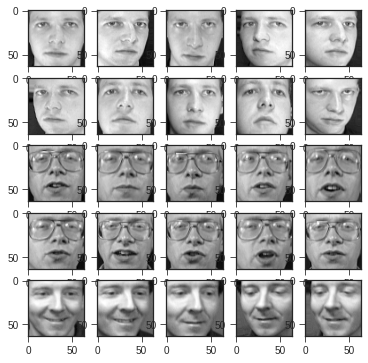

In [ ]:
accuracy = [];

for light_level in light_level_list:
    acc_step = [];
    for step in range(iter):
        acc_step.append(Eigen_faces(Possion, light_level, step))
    accuracy.append(np.mean(acc_step));



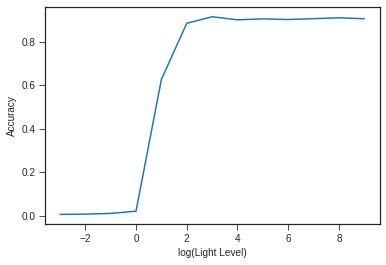

In [ ]:
plt.figure();
plt.plot(np.log10(light_level_list), accuracy);
plt.xlabel("log(Light Level)");
plt.ylabel("Accuracy");
plt.show();

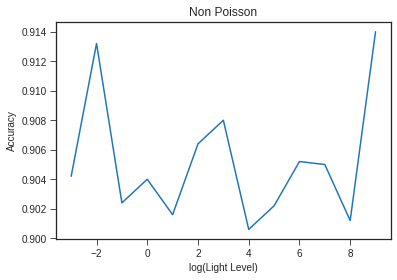

In [ ]:
## Non poisson
accuracy_non_poisson = [];
Possion = False;
for light_level in light_level_list:
    acc_step = [];
    for step in range(iter):
        acc_step.append(Eigen_faces(Possion, light_level, step))
    accuracy_non_poisson.append(np.mean(acc_step));

plt.figure();
plt.plot(np.log10(light_level_list), accuracy_non_poisson);
plt.xlabel("log(Light Level)");
plt.ylabel("Accuracy");
plt.title("Non Poisson")
plt.show();

In [ ]:
print("Mean accuracy w/o Poisson is %.3e" %(np.mean(accuracy_non_poisson)))

Mean accuracy w/o Poisson is 9.052e-01
